In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read,write
from IPython.display import Audio
from numpy.fft import fft, ifft, fftfreq
import pandas as pd
from scipy import signal
from scipy.signal import find_peaks

/home/hogar/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
#pip install ffprobe

In [3]:
#pip install pydub

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
#pip install audioconverter

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
#pip install ffmpeg-python

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#!pip uninstall ffmpeg
#!pip uninstall ffmpeg-python

Found existing installation: ffmpeg 1.4
Uninstalling ffmpeg-1.4:
  Would remove:
    /home/hogar/anaconda3/lib/python3.8/site-packages/ffmpeg-1.4.dist-info/*
    /home/hogar/anaconda3/lib/python3.8/site-packages/ffmpeg/*
  Would not remove (might be manually added):
    /home/hogar/anaconda3/lib/python3.8/site-packages/ffmpeg/_ffmpeg.py
    /home/hogar/anaconda3/lib/python3.8/site-packages/ffmpeg/_filters.py
    /home/hogar/anaconda3/lib/python3.8/site-packages/ffmpeg/_probe.py
    /home/hogar/anaconda3/lib/python3.8/site-packages/ffmpeg/_run.py
    /home/hogar/anaconda3/lib/python3.8/site-packages/ffmpeg/_utils.py
    /home/hogar/anaconda3/lib/python3.8/site-packages/ffmpeg/_view.py
    /home/hogar/anaconda3/lib/python3.8/site-packages/ffmpeg/dag.py
    /home/hogar/anaconda3/lib/python3.8/site-packages/ffmpeg/nodes.py
Proceed (Y/n)? 

In [3]:
from pydub import AudioSegment
#wav_audio = AudioSegment.from_file('../Data/pruebas3/0grad_1.m4a', format="m4a")

#wav_audio.export('../Data/pruebas3/0grad_1.wav', format="wav")   

In [3]:
fold = '../Data/pruebas3/wav/'
files=[fold + '0grad_1.wav',fold + '0grad_2.wav',fold + '0grad_3.wav',fold + '0grad_4.wav',fold + '0grad_5.wav',
      fold + '60grad_1.wav',fold + '60grad_2.wav',fold + '60grad_3.wav',fold + '60grad_4.wav',fold + '60grad_5.wav',
      fold + '120grad_1.wav',fold + '120grad_2.wav',fold + '120grad_3.wav',fold + '120grad_4.wav',
       fold + '120grad_5.wav',fold + '180grad_1.wav',fold + '180grad_2.wav',fold + '180grad_3.wav',
      fold + '180grad_4.wav',fold + '180grad_5.wav',fold + '240grad_1.wav',fold + '240grad_2.wav',
      fold + '240grad_3.wav',fold + '240grad_4.wav',fold + '240grad_5.wav',fold + '300grad_1.wav',
      fold + '300grad_2.wav',fold + '300grad_3.wav',fold + '300grad_4.wav',fold + '300grad_5.wav']

fondo = fold+'ruido.wav'

In [4]:
grads = [0,60,120,180,240,300]

In [5]:
Audio(files[1])

# Previsualización, limpieza y normalización de datos

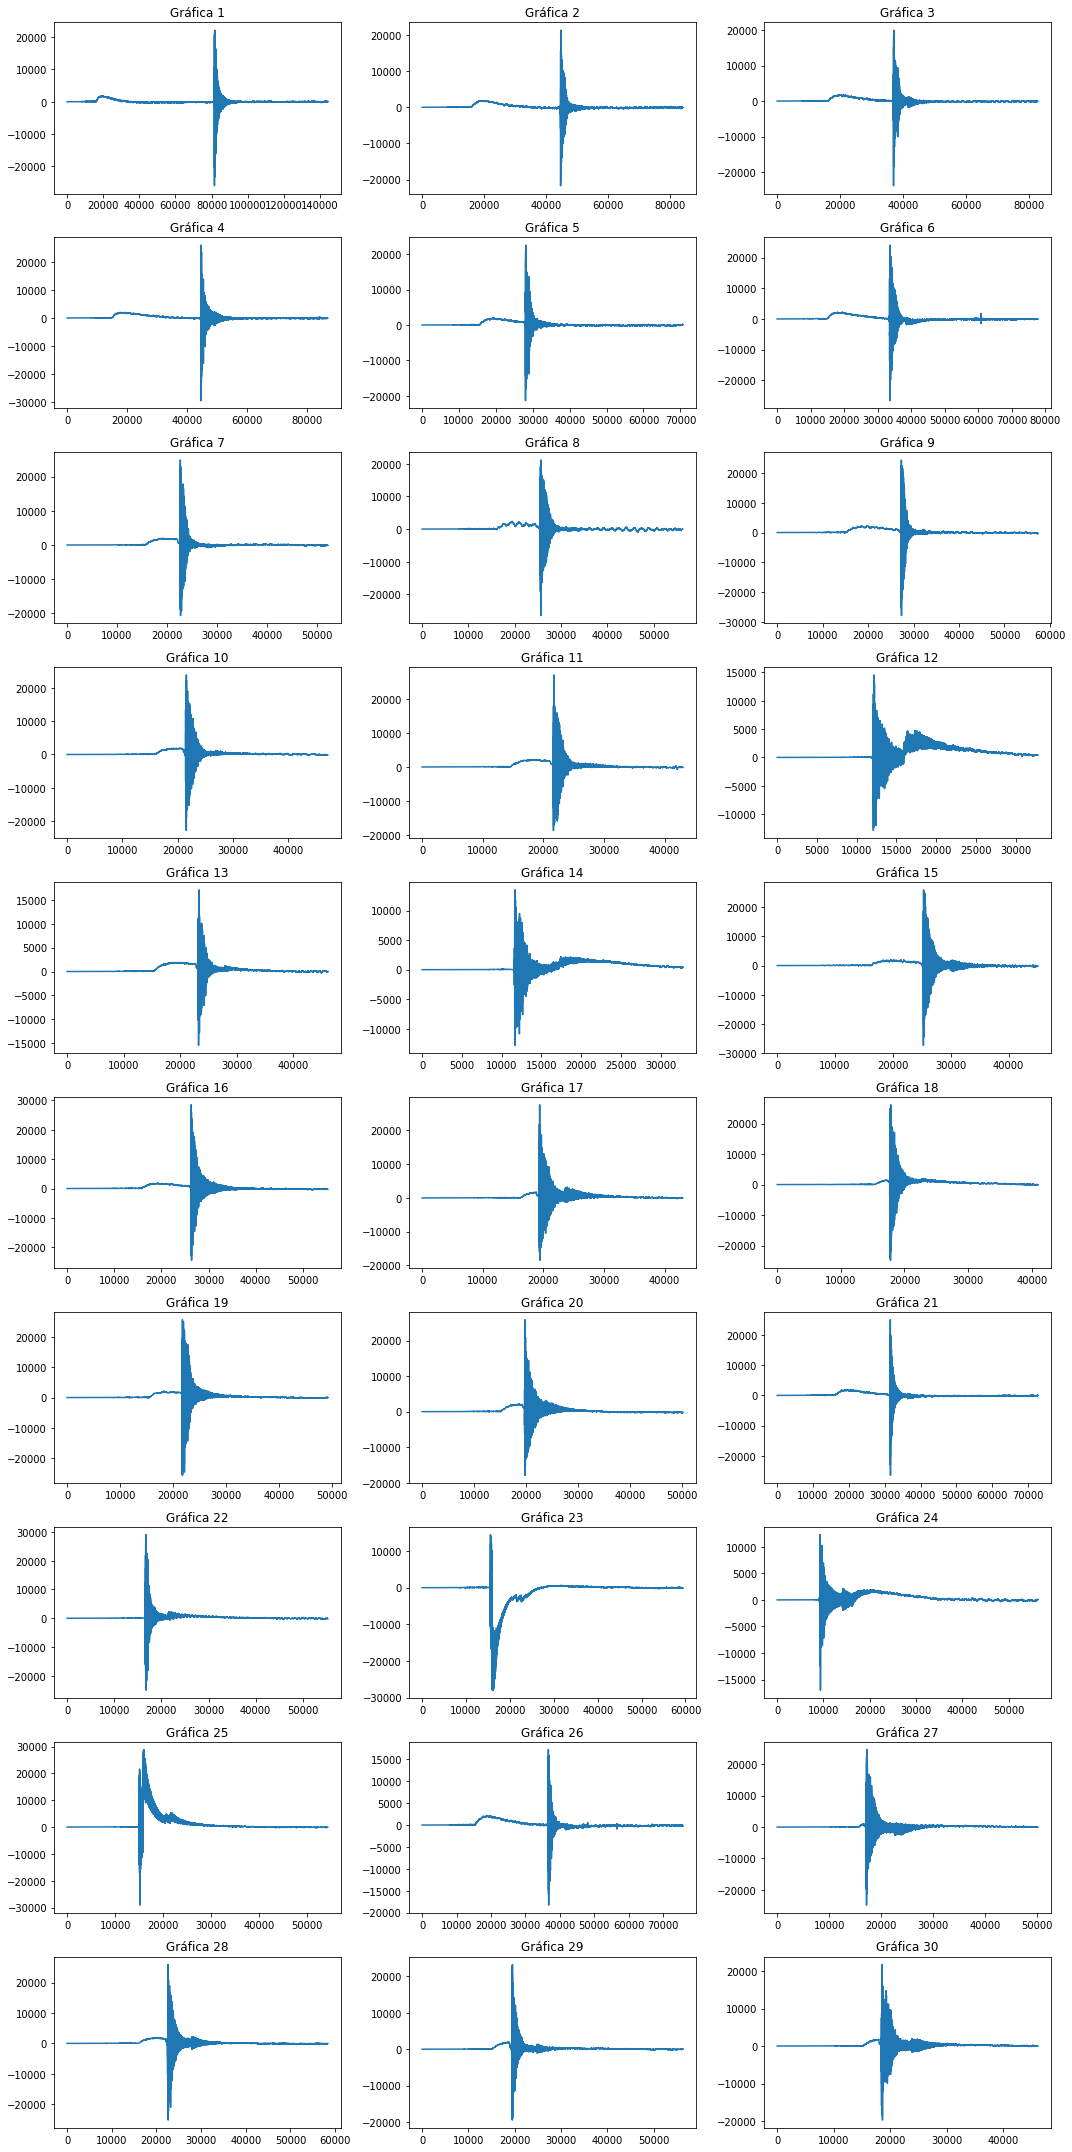

In [6]:
amp = []        
for i in range(0,len(files)): 
    Fs,data = read(files[i])
    amp.append(data[:,0])

        
fig, axs = plt.subplots(10, 3, figsize=(15, 30))

for i, amplitud in enumerate(amp):
    fila = i // 3
    columna = i % 3
    axs[fila, columna].plot(amplitud)
    axs[fila, columna].set_title(f'Gráfica {i+1}')

plt.tight_layout()
plt.show()

### Normalización

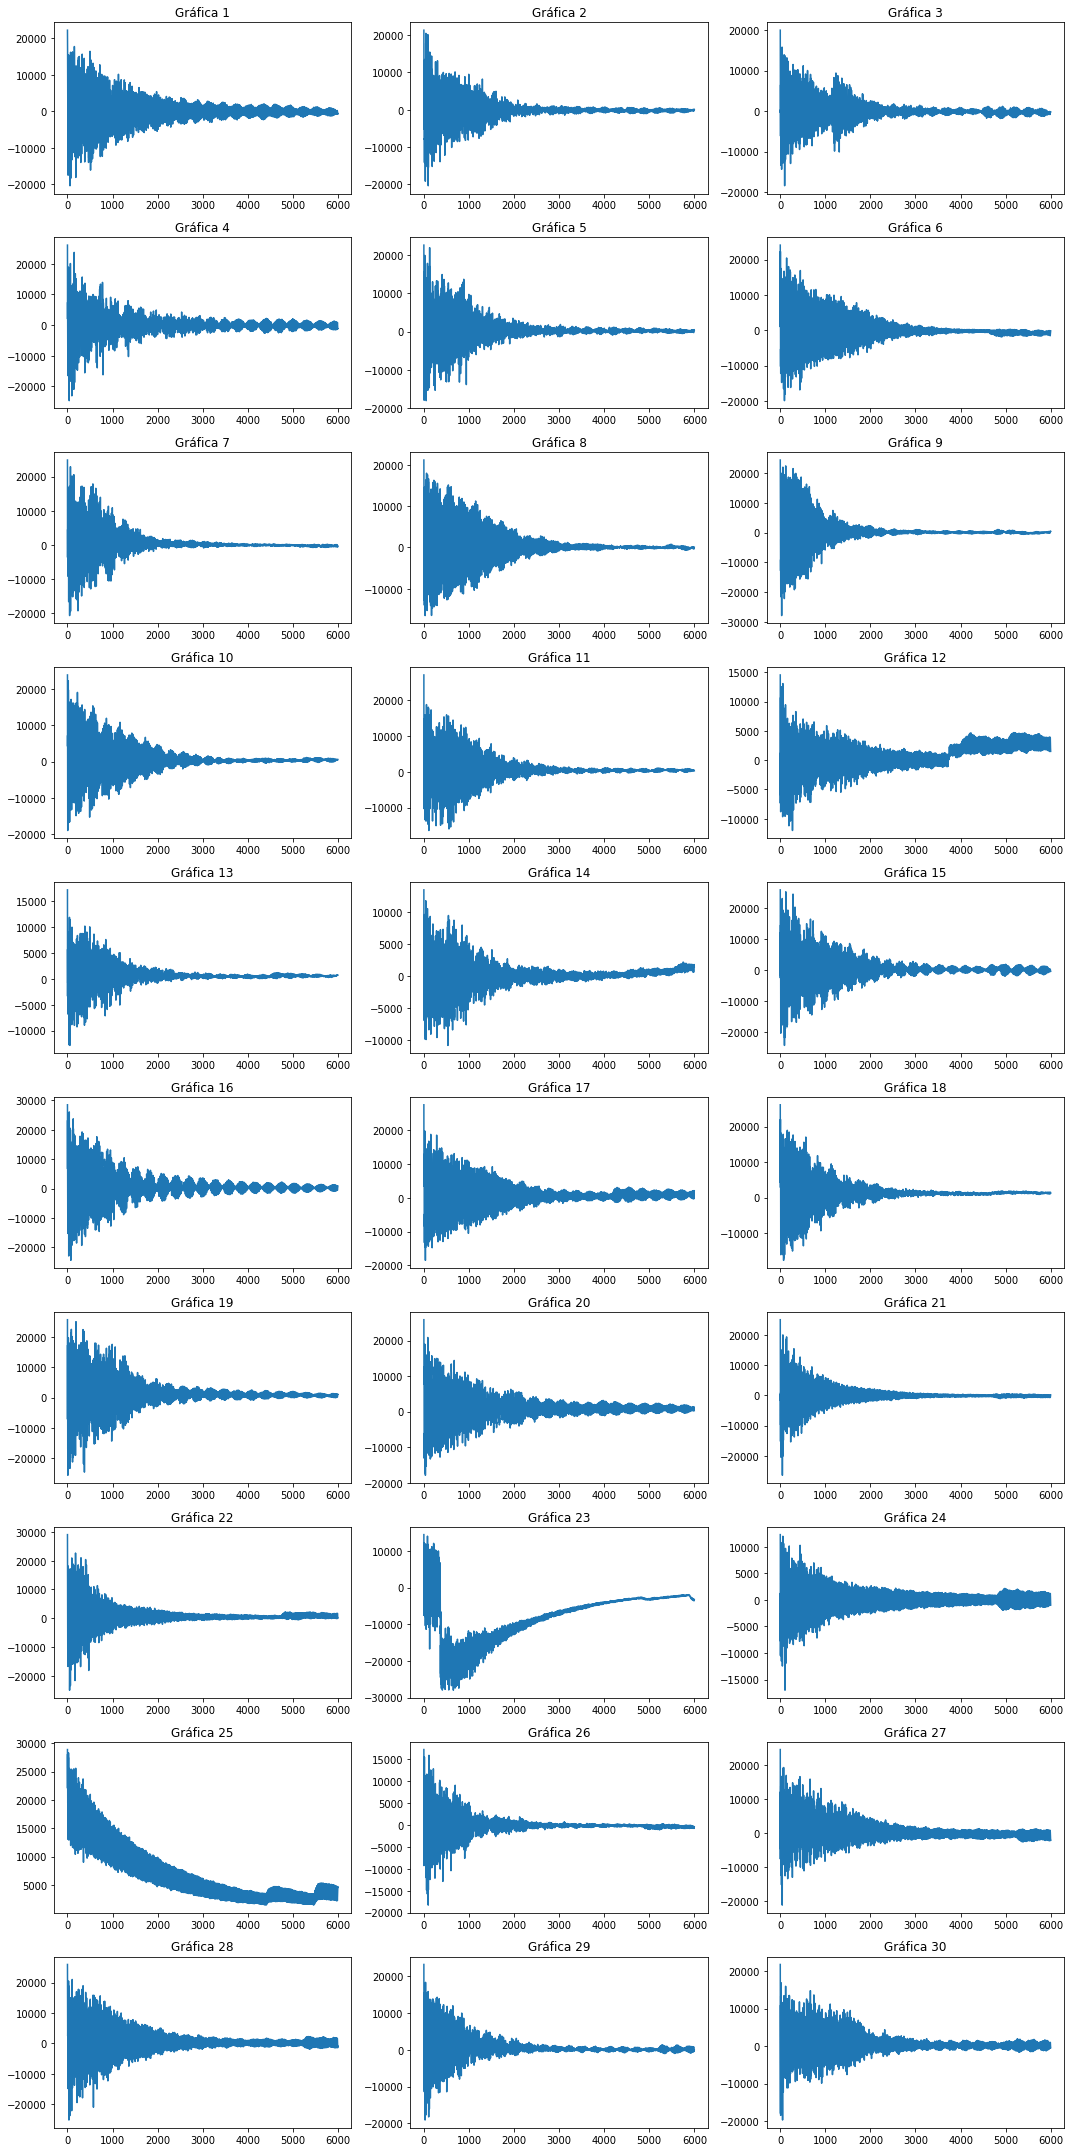

In [7]:
def normalize_pulses(pulses, pulse_duration):
    max_indexes = [np.argmax(pulse) for pulse in pulses]
    end_indexes = [index + pulse_duration for index in max_indexes]    
    max_end_index = max(end_indexes)    
    normalized_pulses = [pulse[index:min(max_end_index, index + pulse_duration)] for pulse, index in zip(pulses, max_indexes)]
    
    return normalized_pulses

interval = 6000

N_pulses = normalize_pulses(amp, interval)



fig, axs = plt.subplots(10, 3, figsize=(15, 30))

for i, amplitude_array in enumerate(N_pulses):
    fila = i // 3
    columna = i % 3
    axs[fila, columna].plot(amplitude_array)
    axs[fila, columna].set_title(f'Gráfica {i+1}')

plt.tight_layout()
plt.show()

En vista de los resultados serán omitidas las gráficas 12,23,25. De este modo tenemos:
* 0 grados: 5 muestras <br>
* 60 grados: 5 muestras <br>
* 120 grados: 4 muestras <br>
* 180 grados: 5 muestras <br>
* 240 grados: 3 muestras <br>
* 300 grados: 5 muetras <br>

In [8]:
for i in [11,22,24]:
    N_pulses[i] = False

In [9]:
def multi_graph(x_coords,y_coords,rows,cols,x_label,y_label,title,color='blue'):
    
    fig, axs = plt.subplots(rows, cols, figsize=(15, 10))
    fig.suptitle(title, fontsize=20)


    for i, (x,y) in enumerate(zip(x_coords,y_coords)):
        row = i // cols
        col = i % cols
        axs[row, col].plot(x,y,color=color)
        axs[row, col].set_title(f'{grads[i]}°',fontsize=15)
        axs[row,col].set_xlabel(x_label, fontsize=12)
        axs[row,col].set_ylabel(y_label, fontsize=12)
        axs[row, col].set_xscale('log')
        


    plt.tight_layout()
    plt.show()

In [10]:
num_arrays = len(N_pulses)
group_size = 5
num_elements = len(N_pulses[0]) 
mean_pulses = []

for i in range(0, num_arrays, 5):
    group = N_pulses[i:i+group_size]  
    mean_array = np.zeros(num_elements)
    
    for array in group:
        mean_array += array
    
    mean_array /= len(group)
    
    mean_pulses.append(mean_array)

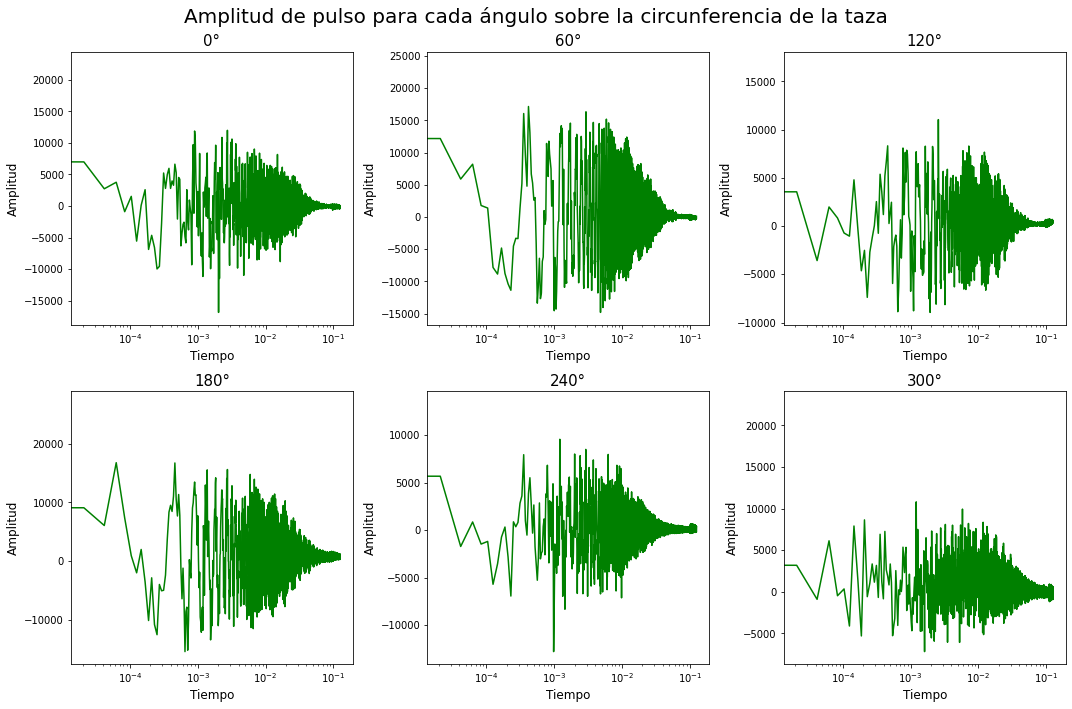

In [11]:
multi_graph([np.linspace(0,interval, interval)/Fs]*len(mean_pulses),mean_pulses,2,3,'Tiempo','Amplitud',
            'Amplitud de pulso para cada ángulo sobre la circunferencia de la taza','green')

# Análisis de Frecuencias

In [12]:
Fs, data = read(fondo)
ruido = data[:,0]
t_fondo = np.arange(0, len(ruido))/Fs

amplitud=[] 
times=[]

amp_fft=[] 
freq_fft =[]

        
for i in range(0,len(mean_pulses)): 
    fourier = fft(mean_pulses[i]) #transformada rápida de fourier de los datos
    freq = fftfreq(interval,1.0/Fs)
    pfreq = freq[:len(freq)//2]
    spectr = np.abs(fourier)[:len(freq)//2]

    freq_fft.append(pfreq)
    amp_fft.append(spectr)

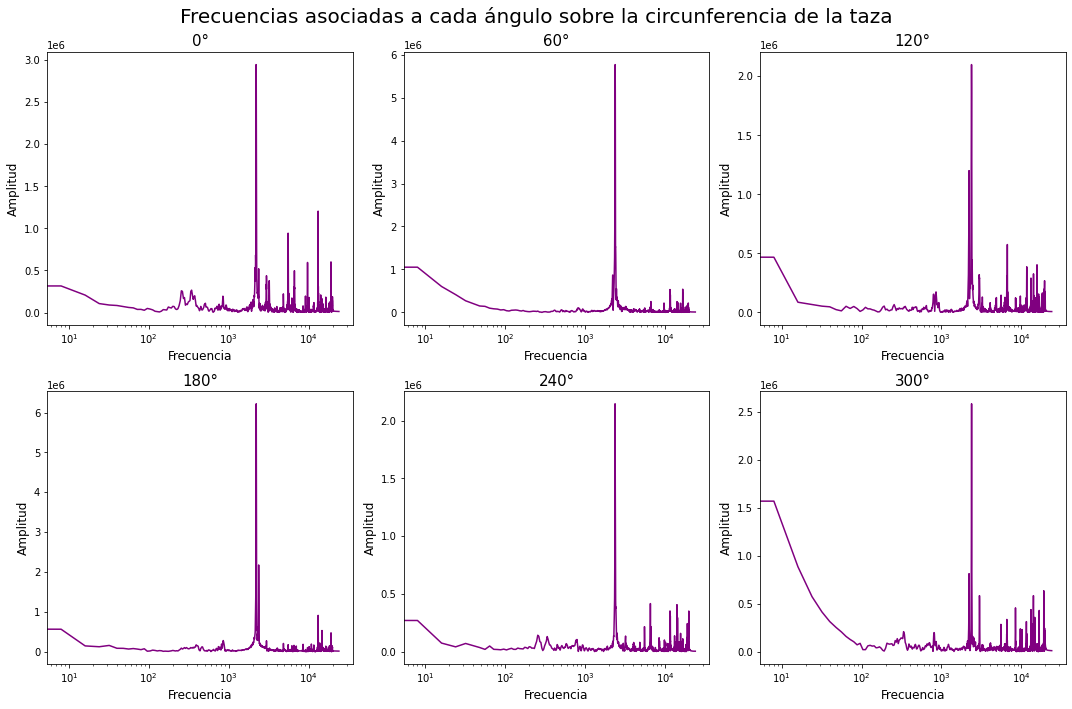

In [13]:
multi_graph(freq_fft,amp_fft,2,3,'Frecuencia',
            'Amplitud','Frecuencias asociadas a cada ángulo sobre la circunferencia de la taza','purple')

In [15]:
#Máximos de frecuencias
maxim = []
modes = []

for i in range(len(freq_fft)):
    indx_max_amp = np.argmax(amp_fft[i])
    maxim.append(freq_fft[i][indx_max_amp])

In [16]:
l = [1,2,3]


In [1]:
np.mean(maxim)

NameError: name 'np' is not defined

In [29]:
maxes = []
for i in peaks:
    maxes.append(np.max(i))

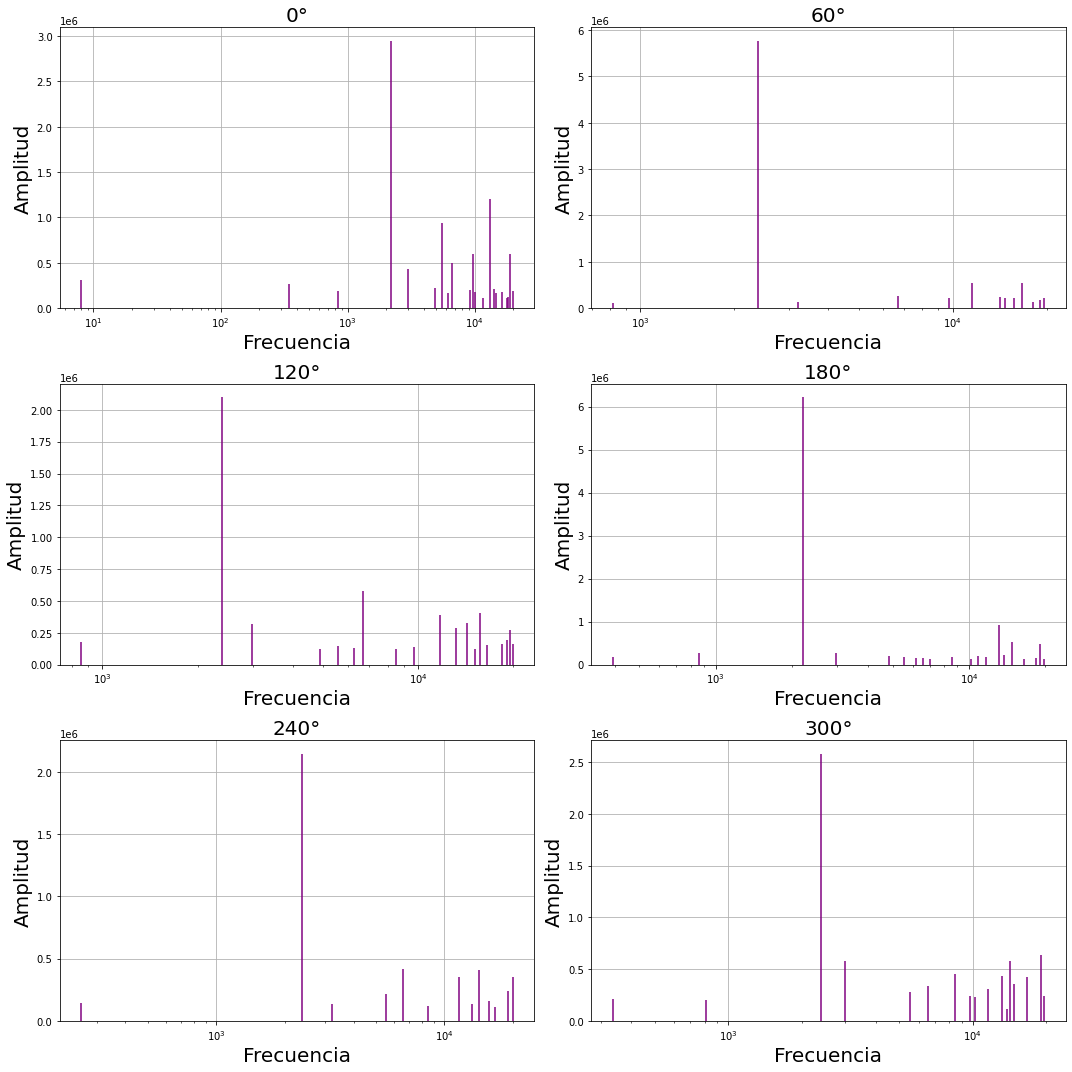

In [22]:
peaks = []
for i in range(6):
    picos, _ = find_peaks(amp_fft[i], prominence=1e5, distance=40)
    peaks.append(picos)


fig, axs = plt.subplots(3, 2, figsize=(15, 15))


for i, ax in enumerate(axs.flat):

    ax.vlines(freq_fft[i][peaks[i]], 0, amp_fft[i][peaks[i]], color='purple', linestyle='-')

    ax.set_ylim(0)

    ax.set_xlabel('Frecuencia',fontsize=20)
    ax.set_ylabel('Amplitud',fontsize=20)
    ax.set_title(f'{grads[i]}°',fontsize=20)
    ax.grid(True)
    ax.set_xscale('log') 

plt.tight_layout()
plt.show()

In [41]:
peaks[0].sort()
peaks[0]

array([   1,   43,  106,  276,  372,  605,  694,  773,  832, 1144, 1214,
       1269, 1459, 1648, 1775, 1839, 2055, 2252, 2295, 2386, 2489])

19